In [1]:
from prophet import Prophet as FacebookProphet

In [2]:
train_data = catalog.load("train_data")

2022-02-19 21:28:32,929 - kedro.io.data_catalog - INFO - Loading data from `train_data` (CSVDataSet)...


In [9]:
serie_data = train_data[(train_data.family == "HOME AND KITCHEN II") & (train_data.store_nbr == 49)].set_index("date")

<AxesSubplot:xlabel='date'>

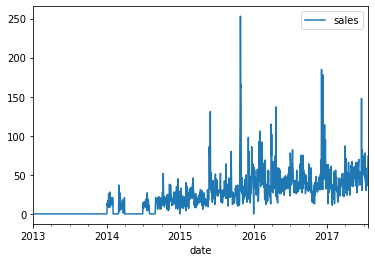

In [12]:
serie_data.sales.plot(legend=True)

In [16]:
import pandas as pd
model = FacebookProphet(yearly_seasonality=False,
                weekly_seasonality=False,
                daily_seasonality=False,)
model.add_seasonality(name='custom', 
                              period=15, 
                              fourier_order=10, 
                              prior_scale=0.3,
                             mode="additive")  
df_train = pd.DataFrame({"ds":serie_data.index, "y": serie_data.sales.values})
model.fit(df_train)

Initial log joint probability = -6.615


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2623.88    0.00304629        117.92      0.1189           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       2624.07   2.09316e-05       87.8834    2.53e-07       0.001      217  LS failed, Hessian reset 
     185       2624.08   1.10458e-06       59.3803           1           1      266   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [17]:
future = model.make_future_dataframe(periods=16)
pred = model.predict(future)

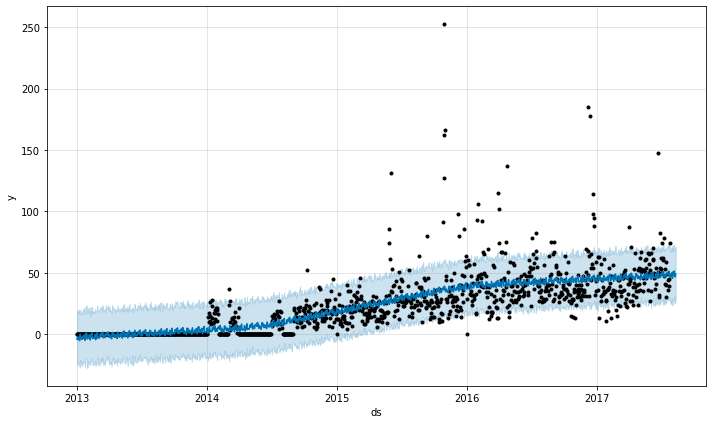

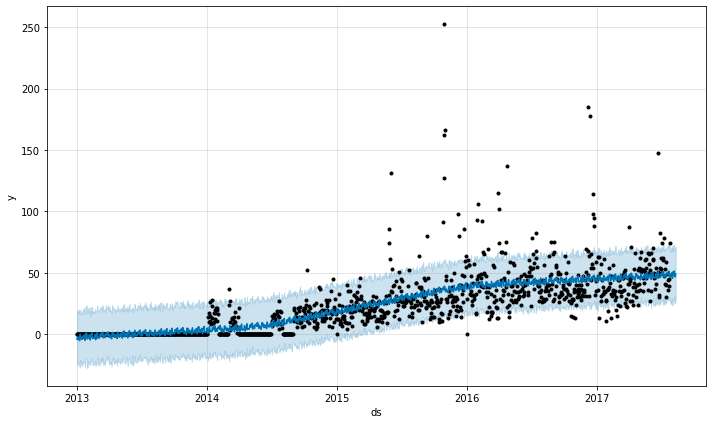

In [19]:
model.plot(pred)